In [1]:
%load_ext autoreload
%autoreload
%matplotlib inline

import newspaper
from newspaper import Article, Config
import glob
import json
import pandas as pd
import numpy as np
from IPython.core.debugger import set_trace
from pathlib import Path
from tqdm.auto import tqdm
tqdm.pandas()

In [2]:
fnames = glob.glob('newsdata/downloaded/*.json')

# 일별 발행갯수 추이

In [3]:
publish_count = {}

for fname in tqdm(fnames):
    js = json.loads(Path(fname).read_text())
    pub = js['pub']
    published_at = js['published_at']

    if pub not in publish_count:
        publish_count[pub] = {}
        
    if published_at not in publish_count[pub]:
        publish_count[pub][published_at] = 0
        
    publish_count[pub][published_at] += 1

In [4]:
df_count = pd.DataFrame.from_dict(publish_count, orient='index').T.sort_index().iloc[-35:]
df_count.index = pd.to_datetime(df_count.index); df_count#['heritage']

,abcnews,afr,aljazeera,americanconservative,arirang,arstechnica,arynews,atlantic,axios,bbc,...,thinkprogress,time,townhall,usatoday,vice,washingtonpost,washingtontimes,wsj,yahoo,zdnet
2019-09-03,48.0,2.0,1.0,1.0,NaN,2.0,NaN,10.0,NaN,89.0,...,6.0,3.0,48.0,2.0,11.0,115.0,131.0,49.0,322.0,31.0
2019-09-04,71.0,3.0,NaN,2.0,NaN,3.0,NaN,16.0,NaN,72.0,...,6.0,64.0,62.0,1.0,16.0,145.0,217.0,42.0,362.0,41.0
2019-09-05,47.0,NaN,NaN,2.0,NaN,1.0,NaN,28.0,NaN,92.0,...,7.0,14.0,47.0,3.0,16.0,116.0,115.0,56.0,180.0,29.0
2019-09-06,50.0,1.0,1.0,3.0,NaN,1.0,NaN,26.0,1.0,86.0,...,NaN,16.0,41.0,NaN,10.0,133.0,128.0,77.0,291.0,36.0
2019-09-07,14.0,NaN,NaN,NaN,NaN,2.0,NaN,10.0,1.0,36.0,...,NaN,6.0,12.0,NaN,10.0,60.0,60.0,25.0,216.0,5.0
2019-09-08,28.0,2.0,NaN,NaN,NaN,NaN,NaN,7.0,NaN,64.0,...,NaN,8.0,17.0,1.0,7.0,87.0,158.0,43.0,259.0,7.0
2019-09-09,66.0,NaN,NaN,NaN,NaN,1.0,NaN,27.0,2.0,89.0,...,NaN,12.0,46.0,1.0,15.0,132.0,190.0,73.0,303.0,41.0
2019-09-10,71.0,3.0,2.0,NaN,NaN,1.0,NaN,22.0,NaN,84.0,...,NaN,12.0,50.0,3.0,16.0,128.0,166.0,63.0,220.0,52.0
2019-09-11,76.0,2.0,NaN,NaN,NaN,2.0,NaN,22.0,1.0,92.0,...,NaN,13.0,57.0,2.0,17.0,127.0,142.0,79.0,282.0,38.0
2019-09-12,80.0,3.0,1.0,NaN,NaN,5.0,NaN,19.0,NaN,103.0,...,NaN,10.0,63.0,NaN,14.0,169.0,239.0,90.0,371.0,32.0


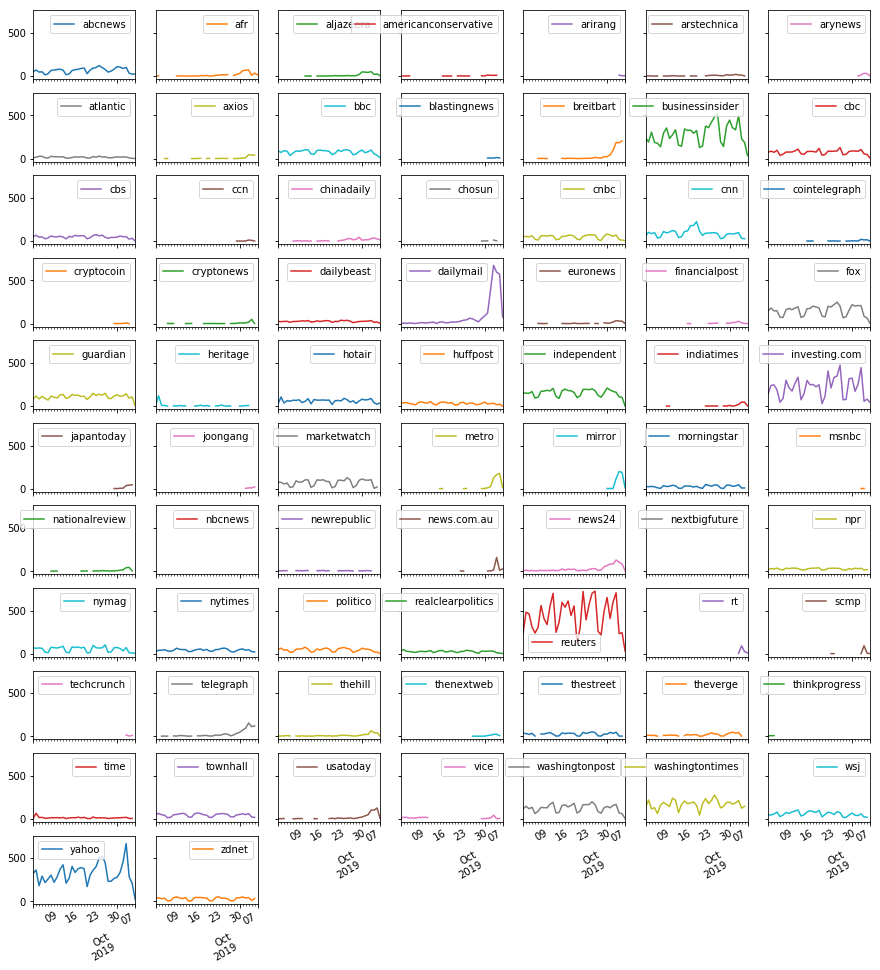

In [5]:
df_count.plot(subplots=True, layout=(15, 7), figsize=(15, 25), sharex=True, sharey=True);

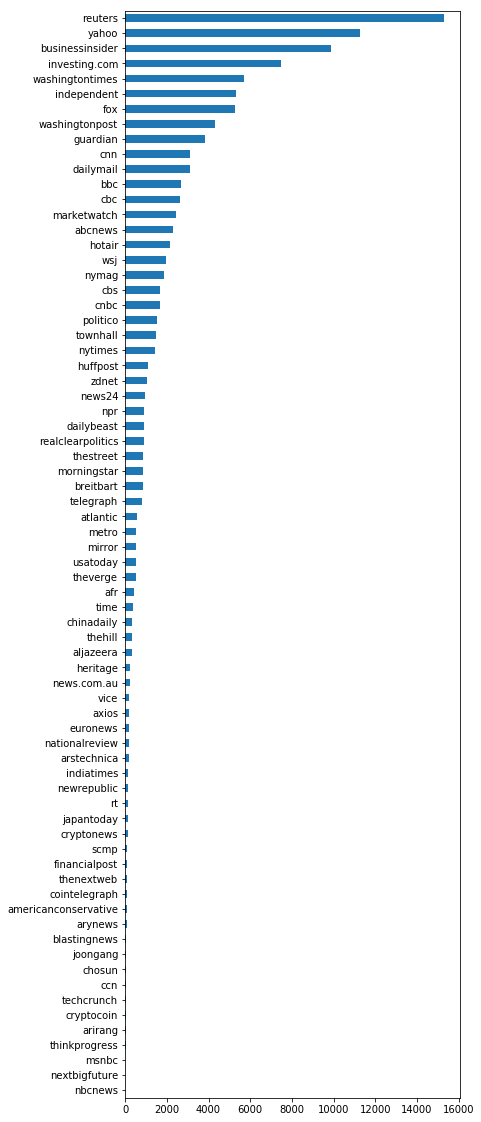

In [6]:
df_count.sum().sort_values().plot.barh(figsize=(6, 20));

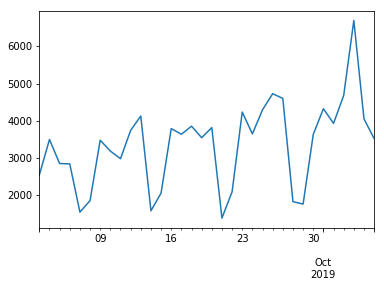

In [23]:
df_count.sum(axis=1)[:-1].plot()

# 일별 총 글자수 추이

In [7]:
publish_size = {}

for fname in tqdm(fnames):
    js = json.loads(Path(fname).read_text())
    pub = js['pub']
    published_at = js['published_at']
    size = len(js['text'])

    if pub not in publish_size:
        publish_size[pub] = {}
        
    if published_at not in publish_size[pub]:
        publish_size[pub][published_at] = 0
        
    publish_size[pub][published_at] += size

In [8]:
df_size = pd.DataFrame.from_dict(publish_size, orient='index').T.sort_index().iloc[-35:]
df_size.index = pd.to_datetime(df_size.index); df_size#['heritage']

,abcnews,afr,aljazeera,americanconservative,arirang,arstechnica,arynews,atlantic,axios,bbc,...,thinkprogress,time,townhall,usatoday,vice,washingtonpost,washingtontimes,wsj,yahoo,zdnet
2019-09-03,131989.0,58656.0,6675.0,2351.0,NaN,4498.0,NaN,32088.0,NaN,394196.0,...,23274.0,20596.0,222857.0,10597.0,53713.0,698669.0,424838.0,246407.0,1013737.0,139650.0
2019-09-04,246099.0,39717.0,NaN,19255.0,NaN,16411.0,NaN,73898.0,NaN,297348.0,...,22796.0,189118.0,239173.0,3842.0,72053.0,797406.0,883485.0,128207.0,1217901.0,132824.0
2019-09-05,197578.0,NaN,NaN,20359.0,NaN,1381.0,NaN,168445.0,NaN,363445.0,...,40086.0,69991.0,190855.0,22491.0,67260.0,844056.0,378854.0,283795.0,565454.0,112775.0
2019-09-06,177591.0,3149.0,1297.0,15559.0,NaN,3756.0,NaN,112605.0,1894.0,458844.0,...,NaN,58204.0,158166.0,NaN,46389.0,852927.0,374479.0,379774.0,903217.0,162313.0
2019-09-07,63649.0,NaN,NaN,NaN,NaN,20227.0,NaN,52918.0,2169.0,139188.0,...,NaN,33299.0,42027.0,NaN,63772.0,372183.0,195088.0,125583.0,690729.0,16813.0
2019-09-08,127069.0,6082.0,NaN,NaN,NaN,NaN,NaN,19357.0,NaN,261220.0,...,NaN,23940.0,58061.0,5609.0,42544.0,541715.0,476886.0,223232.0,845625.0,20839.0
2019-09-09,198846.0,NaN,NaN,NaN,NaN,1940.0,NaN,106960.0,1911.0,357811.0,...,NaN,49509.0,174184.0,5927.0,59245.0,799227.0,648073.0,343387.0,1019249.0,127411.0
2019-09-10,250422.0,11072.0,9503.0,NaN,NaN,9912.0,NaN,76793.0,NaN,379691.0,...,NaN,44098.0,197582.0,23519.0,70783.0,717575.0,507739.0,291499.0,715513.0,179555.0
2019-09-11,264389.0,7085.0,NaN,NaN,NaN,7797.0,NaN,121091.0,2475.0,421692.0,...,NaN,42483.0,228371.0,12571.0,64233.0,835250.0,414040.0,409044.0,1018415.0,131376.0
2019-09-12,304782.0,2940.0,7257.0,NaN,NaN,22846.0,NaN,95302.0,NaN,396318.0,...,NaN,54862.0,226641.0,NaN,56256.0,1168762.0,675754.0,334444.0,1187721.0,144565.0


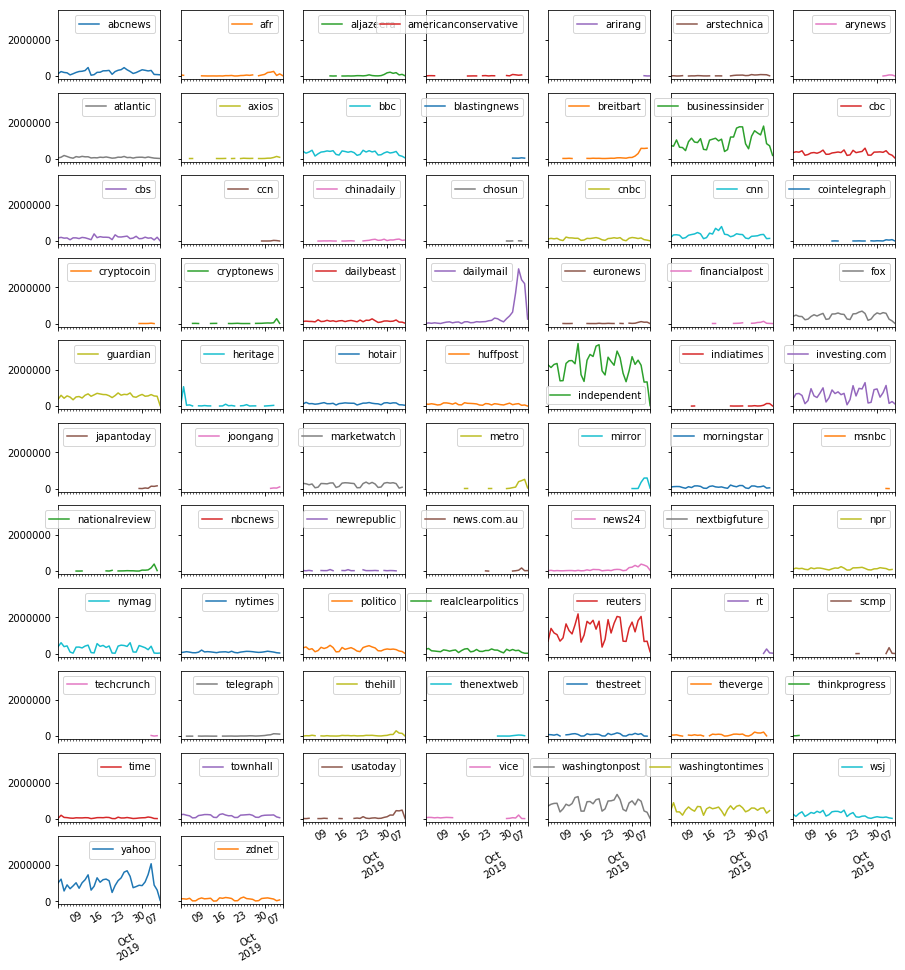

In [9]:
df_size.plot(subplots=True, layout=(15, 7), figsize=(15, 25), sharex=True, sharey=True);

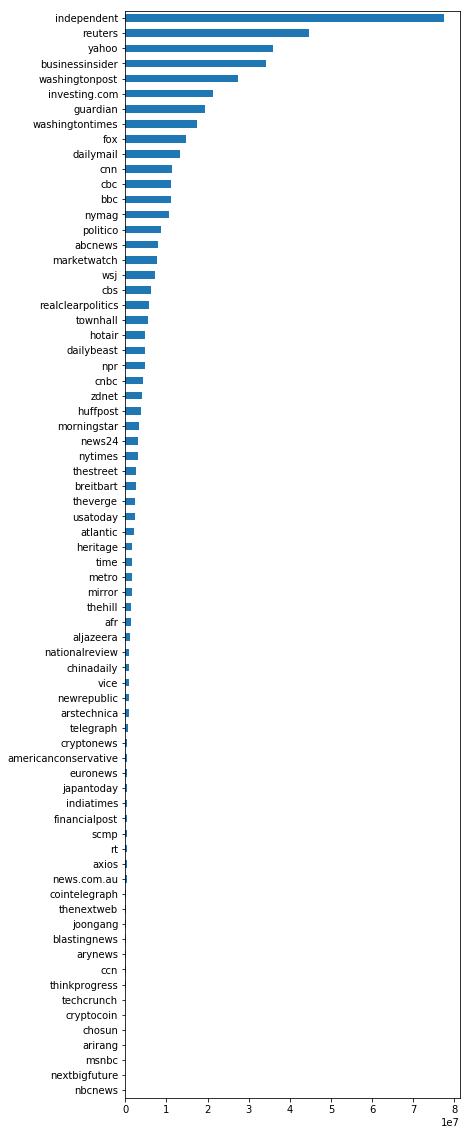

In [11]:
df_size.sum().sort_values().plot.barh(figsize=(6, 20));

In [12]:
(df_size.iloc[-10:].sum()/df_size.iloc[-10:].sum().sum()*100).sort_values()

thinkprogress            0.000000
nbcnews                  0.000498
nextbigfuture            0.002505
msnbc                    0.006222
arirang                  0.021364
cryptocoin               0.031500
chosun                   0.034148
techcrunch               0.051784
ccn                      0.066102
heritage                 0.071323
blastingnews             0.101837
arynews                  0.104844
newrepublic              0.121461
joongang                 0.129343
thenextweb               0.179135
cointelegraph            0.190029
axios                    0.217533
news.com.au              0.234316
financialpost            0.242085
americanconservative     0.244399
vice                     0.251606
time                     0.257500
rt                       0.258670
scmp                     0.272706
euronews                 0.289140
indiatimes               0.289781
cryptonews               0.339491
atlantic                 0.345069
japantoday               0.353692
arstechnica   

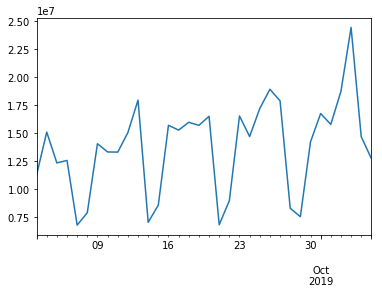

In [24]:
df_size.sum(axis=1)[:-1].plot()

# 일별 아티클당 평균 글자수 추이

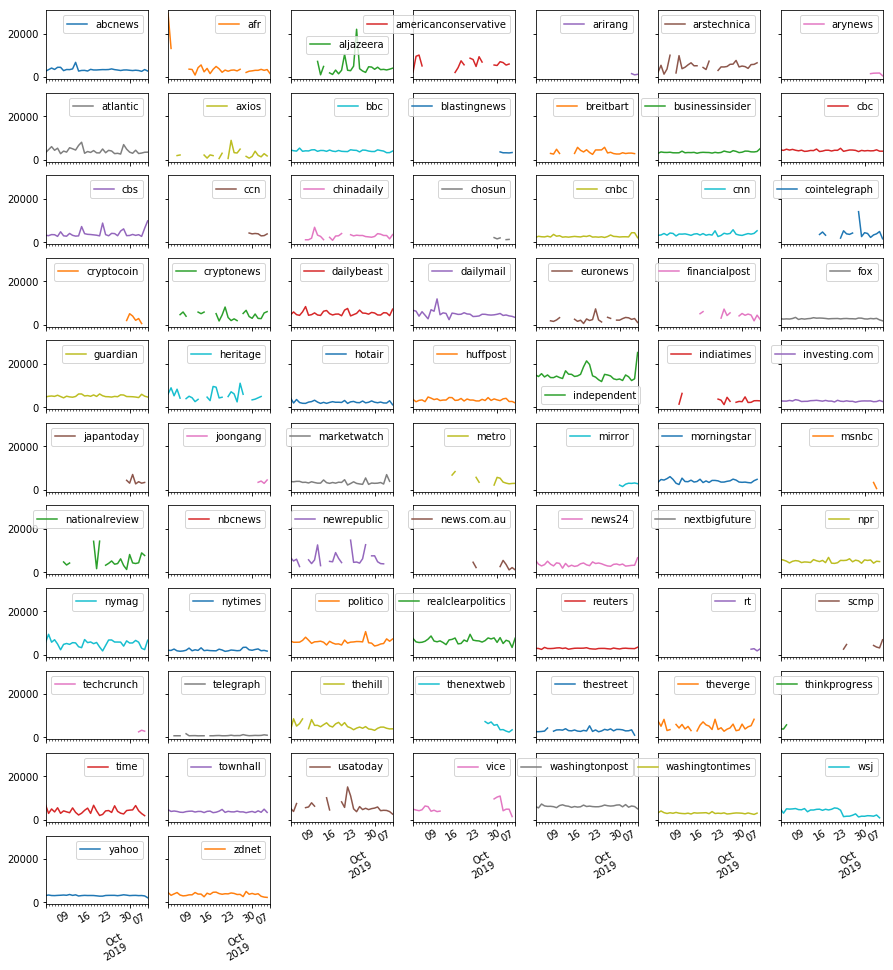

In [14]:
(df_size/df_count).plot(subplots=True, layout=(15, 7), figsize=(15, 25), sharex=True, sharey=True);

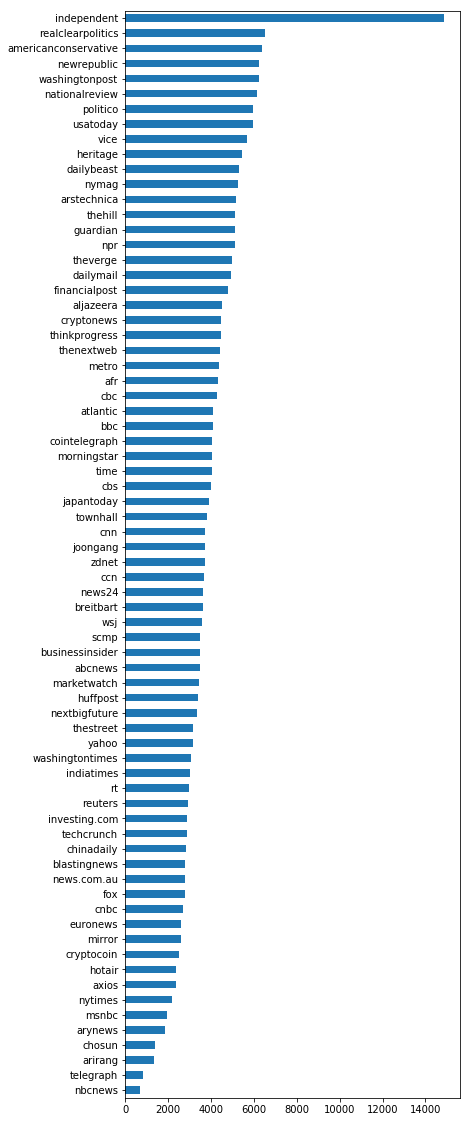

In [15]:
(df_size/df_count).mean().sort_values().plot.barh(figsize=(6, 20));

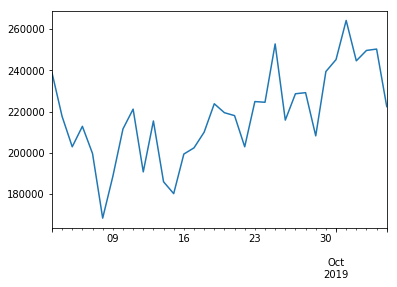

In [28]:
(df_size/df_count).sum(axis=1)[:-1].plot()

In [229]:
%load_ext autoreload
%autoreload
%matplotlib inline

from news_crawler import NewsCrawler, news_publishers
from IPython.display import display
import os
import hashlib

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [230]:
fnames_downloaded = glob.glob('newsdata/downloaded/*.json')
fnames_trashed = glob.glob('newsdata/trashed/*/*.json')

In [226]:
fnames_int = set()
for fname in tqdm(fnames_trashed):
    js = json.loads(Path(fname).read_text())
    
    if js['pub']!='yahoo' and 'yahoo.com' in js['url']:
        fnames_int.add(fname)

In [227]:
len(fnames_int)

0

In [224]:
fnames_int

{'newsdata/downloaded\\004bbc7f3c2590d008cc4af16adb35838a990506.json',
 'newsdata/downloaded\\0c3c5cdb8815f431af832c730de47cf1a4d50148.json',
 'newsdata/downloaded\\0e82020cfca7da98b4f79b2b0228776678210663.json',
 'newsdata/downloaded\\0f2e55a4959f46d438ab34a8a9d69e757e70cfcc.json',
 'newsdata/downloaded\\1692530da9fb1620eeaedd6b95b19da14a8b02e1.json',
 'newsdata/downloaded\\17deb27c1d36a43370ac6b012124d261cbbb4428.json',
 'newsdata/downloaded\\1976a557e3cc00cc32b6f7cc74c290ea5c37b19b.json',
 'newsdata/downloaded\\3e8f95c21f7ca97fc29bedf9aaebc100d7714098.json',
 'newsdata/downloaded\\58f6dfc2190e509104c4183acd2047c706e0c6ac.json',
 'newsdata/downloaded\\595da8bb68cdea20e48812d5f8c1eebbcc778b95.json',
 'newsdata/downloaded\\5e08280c30c6bbeccbf2a8c325f5b8f62f97af84.json',
 'newsdata/downloaded\\63db77083ce8a052408db6517507590f384727b5.json',
 'newsdata/downloaded\\6a15ae52ab31614b9004d88c17c16b15f1b7900a.json',
 'newsdata/downloaded\\6d2eb25aea26bc677b92a8fc28762f498c213d95.json',
 'news

In [225]:
for fname in tqdm(fnames_int):
    js = json.loads(Path(fname).read_text())
    js['pub'] = 'yahoo'
    with open(fname, 'w') as f:
        json.dump(js, f)

In [241]:
fnames_int = set()
for fname in tqdm(fnames_trashed):
    js = json.loads(Path(fname).read_text())
    
    if js['pub']=='chosun':
        fnames_int.add(fname)

In [243]:
fnames_int

{'newsdata/trashed\\006\\006487b4cbefe21a71af7a9a9d8560161b6a52d4.json',
 'newsdata/trashed\\042\\0424b8f058739963bc5968464964cecd64f0432c.json',
 'newsdata/trashed\\058\\0580787537e4d0f6fe3727b737efd67810f691a2.json',
 'newsdata/trashed\\082\\0825a6ea58140de0d4e229679a9dff8fe797bbf9.json',
 'newsdata/trashed\\08d\\08db617846f593f2b60fbf4812cd2e352b2b7f88.json',
 'newsdata/trashed\\08f\\08fae21d1eb98880f80fb0b8bc3ef9ba13a5cecf.json',
 'newsdata/trashed\\091\\09106461851e343307142392588d51f0b79c14f6.json',
 'newsdata/trashed\\09a\\09adc529c401a32f28dd2df929559e861ec5decf.json',
 'newsdata/trashed\\0a3\\0a327655e18828494755dfe0575963789151d5c1.json',
 'newsdata/trashed\\0a6\\0a63e83239ccb68db3f61ff64282ca0f1382ffa0.json',
 'newsdata/trashed\\0b0\\0b0800de052cf40653ecd29caf2a1c2daa417e91.json',
 'newsdata/trashed\\0ba\\0bad577983f1a399779c0884013f2b821350067f.json',
 'newsdata/trashed\\0cb\\0cb9f81435ceb92f47afda2f819b487282e578a6.json',
 'newsdata/trashed\\0f3\\0f30ecf1b0063f0f5f54ed2ffd

In [237]:
for fname in tqdm(fnames_int):
    js = json.loads(Path(fname).read_text())
    print(js['url'])

https://pdf.joins.com/Media/List.aspx?mseq=86
https://joins.com/Media/List.aspx?mseq=209
https://joins.com/Media/List.aspx?mseq=59
https://joins.com/Media/List.aspx?mseq=132
https://joins.com/Media/List.aspx?mseq=84
https://pdf.joins.com/Media/List.aspx?mseq=119
https://joins.com/Media/List.aspx?mseq=19
https://joins.com/Media/List.aspx?mseq=135
https://pdf.joins.com/Media/List.aspx?mseq=110
https://joins.com/Media/List.aspx?mseq=119
https://joins.com/Media/List.aspx?mseq=20
https://joins.com/Media/List.aspx?mseq=156
https://pdf.joins.com/Media/List.aspx?mseq=118
https://news.joins.com/article/23589274
https://joins.com/Media/List.aspx?mseq=86
https://pdf.joins.com/Media/List.aspx?mseq=22
https://joins.com/Media/List.aspx?mseq=100
https://joins.com/Media/List.aspx?mseq=207
https://pdf.joins.com/Media/List.aspx?mseq=193
https://pdf.joins.com/Media/List.aspx?mseq=156
https://koreajoongangdaily.joins.com/news/list/List.aspx?gCat=020901
https://pdf.joins.com/Media/List.aspx?mseq=11
https:/

In [202]:
pubs = news_publishers.src.keys()

In [203]:
df_dups = {}
for fname in tqdm(fnames_int):
    js = json.loads(Path(fname).read_text())
    url = js['url']
    pub = js['pub']
    thepubs = [p for p in pubs if p in url]
    
    if 'time' in thepubs: thepubs.remove('time')
    if 'rt' in thepubs: thepubs.remove('rt')
    
    df_dups[fname] = [url, pub, ','.join(thepubs)]

df_dups = pd.DataFrame.from_dict(df_dups, orient='index', columns=['url', 'pub', 'thepub'])
df_dups = df_dups[df_dups.thepub!='']

In [204]:
df_dups = df_dups[~df_dups.url.str.contains('businesstimes')]
df_dups = df_dups[~df_dups.url.str.contains('barrons.com')]
df_dups = df_dups[~df_dups.url.str.contains('thecut.com')]
df_dups = df_dups[~df_dups.url.str.contains('vulture.com')]
df_dups = df_dups[~df_dups.url.str.contains('mansionglobal.com')]
df_dups = df_dups[~df_dups.url.str.contains('kotaku.com')]
df_dups = df_dups[~df_dups.url.str.contains('gizmodo.com')]
df_dups = df_dups[~df_dups.url.str.contains('pedestrian.tv')]
df_dups = df_dups[~df_dups.url.str.contains('newsbtc.com')]
df_dups = df_dups[~df_dups.url.str.contains('realcleardefense.com')]
df_dups = df_dups[~df_dups.url.str.contains('thelily.com')]
df_dups = df_dups[~df_dups.url.str.contains('twitchy.com')]
df_dups = df_dups[~df_dups.url.str.contains('lifehacker.com')]
df_dups = df_dups[~df_dups.url.str.contains('insidehook.com')]
df_dups = df_dups[~df_dups.url.str.contains('thestrategist.co')]
df_dups = df_dups[~df_dups.url.str.contains('registerguard.com')]
df_dups = df_dups[~df_dups.url.str.contains('washingtonexaminer.com')]
df_dups = df_dups[~df_dups.url.str.contains('thenation.com')]
df_dups = df_dups[~df_dups.url.str.contains('theweek.com')]
df_dups = df_dups[~df_dups.url.str.contains('bleacherreport.com')]
df_dups = df_dups[~df_dups.url.str.contains('bearingarms.com')]
df_dups = df_dups[~df_dups.url.str.contains('publicintegrity.org')]
df_dups = df_dups[~df_dups.url.str.contains('dailycaller.com')]
df_dups = df_dups[~df_dups.url.str.contains('msn.com')]
df_dups = df_dups[~df_dups.url.str.contains('arysports.tv')]
df_dups = df_dups[~df_dups.url.str.contains('redstate.com')]
df_dups = df_dups[~df_dups.url.str.contains('salon.com')]

In [218]:
list(df_dups.url)

['https://theatlantic.com/business/archive/2016/05/car-alarms-dont-work-why-so-common/482769',
 'https://nymag.com/intelligencer/2019/08/biden-posts-video-of-obama-complimenting-him.html',
 'https://thisismoney.co.uk/news/article-7462263/Car-makers-leave-handbrakes-future-switch-electronic-devices.html',
 'https://hotair.com/archives/ed-morrissey/2019/09/23/biden-2018-youre-damn-right-ordered-us-aid-money-code-red-ukraine-prosecutor-going-sons-company',
 'https://foxnews.com/science/teen-builds-working-nuclear-fusion-reactor-in-memphis-home',
 'https://washingtonpost.com/opinions/2019/05/08/why-joe-bidens-alleged-ukraine-conspiracy-doesnt-hold-up',
 'https://npr.org/2016/09/21/494883725/trump-says-african-americans-are-in-their-worst-shape-ever-the-data-disagrees',
 'https://mirror.co.uk/news/weird-news/you-can-now-visit-5d-14228433',
 'https://theamericanconservative.com/articles/brexit-how-can-it-be-a-coup-if-the-people-voted-for-it',
 'https://usatoday.com/story/opinion/2019/09/26/t

In [220]:
sum(df_dups.url.str.contains('yahoo.com'))

29

In [20]:
def makedir_if_not_exists(file):
    _dir = os.path.dirname(file)

    if not os.path.isdir(_dir):
        os.makedirs(_dir)

In [21]:
for fname in tqdm(fnames_trashed):
    file = Path(fname)
    js = json.loads(file.read_text())
    basename = os.path.basename(fname)
    fname_new = os.path.join('newsdata', 'trashed', basename[:3], basename)
    
    makedir_if_not_exists(fname_new)
    with open(fname_new, 'w') as f:
        json.dump(js, f)
     
    file.unlink()

In [47]:
urls_trashed = {} 

for fname in tqdm(fnames_trashed):
    js = json.loads(Path(fname).read_text())
    
    if 'error' in js: continue
    
    pub = js['pub']
    url = js['url']

    if pub not in urls_trashed:
        urls_trashed[pub] = set()

    urls_trashed[pub].add(url)

In [35]:
crawler = NewsCrawler()

In [36]:
crawler.urls_selected = {'zdnet': {'https://www.zdnet.de/2096276/micrografx-kuendigt-picture-publisher-10-an/#comment-909929'}} #urls_trashed

In [37]:
download_results = crawler.download2(); download_results

100.00% (1.57 seconds): downloading... zdnet               

,downloaded,trashed
zdnet,0,1


In [9]:
crawler.urls_final

In [43]:
for url in set.union(*urls_trashed.values()):
    hash_url = hashlib.sha1(url.encode('utf-8')).hexdigest()
    file = os.path.join('newsdata', 'trashed', hash_url[:3], hash_url + '.json')
    Path(file).unlink()

In [21]:
npaper = newspaper.build('https://www.vice.com/en_us')

In [23]:
len(npaper.article_urls())

108